In [1]:
import pickle
import csv

from settings import *
from clustering import *
from objects import *

from sklearn.cluster import DBSCAN

hr = HR(data)

In [2]:
def draw(df_prime, var_x, var_y, eps, min_samples, metric, title, colors):
    pp.cla()
    pp.clf()
    figure, axes = pp.subplots()

    for i, color in zip(set(df_prime["cluster"]),colors):
        points = df_prime[df_prime["cluster"] == i][[var_x, var_y]]
        #if points.shape[0] <= 50:
        #    pass
        
        axes.scatter(points[var_x], points[var_y], label=str(i), color=color)

    axes.set_xlabel(labels_pretty_print[var_x])
    axes.set_ylabel(labels_pretty_print[var_y])
    axes.legend()
    pp.title(labels_pretty_print[var_x] + " " + labels_pretty_print[var_y] +
             "\neps := " + str(eps) + " k := " + str(min_samples))
    pp.savefig(title + ".svg")
    pp.show()

In [4]:
with open("pickles/dbscan/average_montly_hours,number_project-euclidean-200dbscan.eps.graphs", "rb") as log:
    dbscan_graph = pickle.load(log)

var_x = "average_montly_hours"
var_y = "number_project"

i = 10000
j = 12000
distances = dbscan_graph[i:j]
sorted_distances = sorted(distances)
sorted_set_distances = sorted(set(distances))

In [6]:
filtered_sorted_set_distances = list(filter(lambda x:x < .2, sorted_set_distances))
filtered_sorted_set_distances

[0.080091144729794062,
 0.080091144729794117,
 0.080091144729794173,
 0.080091144729794284,
 0.10011393091224252,
 0.10011393091224258,
 0.10011393091224263,
 0.10011393091224274,
 0.12013671709469098,
 0.12013671709469109,
 0.12013671709469115,
 0.1201367170946912,
 0.14015950327713955,
 0.14015950327713961,
 0.14015950327713966,
 0.16018228945958801,
 0.16018228945958812]

In [78]:
eps = 0.10012
min_points = 200
distances = dbscan_graph
#distances = np.clip(distances,0, 1)
sorted_distances = sorted(distances)
set_sorted_distances = sorted(set(distances))

# Preprocess
df_prime = hr.normal[[var_x, var_y]]
#df_prime = df_prime.drop_duplicates()

dbscan = DBSCAN(eps=eps, min_samples=min_points, metric="euclidean")
clusters = dbscan.fit_predict(df_prime)
df_prime = df_prime.assign(cluster = clusters)
hist, bins = np.histogram(dbscan.labels_, bins=range(-1, len(set(dbscan.labels_)) + 1))
title = labels_pretty_print[var_x] + " " + labels_pretty_print[var_y] + "\neps := " + str(eps) + " k := " + str(min_points)

colors_keys = ["red", "yellow", "black", "orange", "blue", "silver", "green"]
colors = [large_palette_full[key] for key in colors_keys]
#draw(df_prime, var_x, var_y, eps, min_points, "euclidean", title, colors)


# Cross variables
colors_keys = ["yellow", "red", "orange", "green", "blue"]
colors = [large_palette_full[key] for key in colors_keys]

pp.cla()
pp.clf()

df_prime = df_prime.assign(left = hr.normal["left"])
df_prime = df_prime.assign(Years = hr.data["time_spend_company"])
df_prime = df_prime.assign(promoted = hr.data["promotion_last_5years"])
phi = pd.crosstab(df_prime["Years"], df_prime["cluster"])
phi_ptg = phi.div(phi.sum(1).astype(float), axis=0)
phi_ptg.plot(kind="bar", stacked=True, color=colors)
pp.title("Cluster heterogeneity per years spent in company")
#pp.show()
pp.savefig("average_montly_hours-number_project-time.svg")
phi

phi_ptg

cluster,-1,0,1,2,3
Years,,,,,
2,0.179716,0.020962,0.080456,0.344945,0.373921
3,0.146671,0.252367,0.061307,0.273165,0.266491
4,0.519750,0.016034,0.060618,0.214314,0.189284
5,0.309572,0.015614,0.312288,0.287169,0.075356
6,0.345404,0.015320,0.207521,0.272981,0.158774
7,0.297872,0.010638,0.095745,0.308511,0.287234
8,0.259259,0.012346,0.098765,0.271605,0.358025
10,0.158879,0.009346,0.074766,0.336449,0.420561


In [48]:
clusters_prime = [df_prime[df_prime["cluster"] == i] for i in range(-1,4)]
means_prime = [df["time"].mean() for df in clusters_prime]
std_prime = [df["time"].std() for df in clusters_prime]

means = {i: mean for mean,i in zip(means_prime, range(-1,4))}
stds = {i: std for std,i in zip(std_prime, range(-1,4))}

print(str(means))
print(str(stds))

{-1: 3.8323855943677225, 0: 3.0473239436619717, 1: 4.0374149659863949, 2: 3.431042654028436, 3: 3.2527987503254363}
{-1: 1.3790381148222906, 0: 0.51800980081333059, 1: 1.5406765589415978, 2: 1.531445955759384, 3: 1.5848840334017413}


In [50]:
# Cross variables
df_prime = df_prime.assign(time = hr.discrete["time_spend_company"])
df_prime = df_prime.assign(left = hr.discrete["left"])
df_prime = df_prime.assign(wage = hr.discrete["salary"])
df_prime = df_prime.assign(promoted = hr.discrete["promotion_last_5years"])

colors_keys = ["yellow", "red", "orange", "green", "blue"]
colors = [large_palette_full[key] for key in colors_keys]

phi = pd.crosstab(df_prime["time"], df_prime["cluster"])
phi_ptg = phi.div(phi.sum(1).astype(float), axis=0)
phi_ptg.plot(kind="bar", stacked=True, color=colors)
#pp.show()
pp.savefig(var_x + "-" + var_y + "-time.svg")
phi
phi_ptg

cluster,-1,0,1,2,3
time,,,,,
2,0.179716,0.020962,0.080456,0.344945,0.373921
3,0.146671,0.252367,0.061307,0.273165,0.266491
4,0.519750,0.016034,0.060618,0.214314,0.189284
5,0.309572,0.015614,0.312288,0.287169,0.075356
6,0.345404,0.015320,0.207521,0.272981,0.158774
7,0.297872,0.010638,0.095745,0.308511,0.287234
8,0.259259,0.012346,0.098765,0.271605,0.358025
10,0.158879,0.009346,0.074766,0.336449,0.420561


In [3]:
with open("pickles/dbscan/average_montly_hours,number_project-cosine-200dbscan.eps.graphs", "rb") as log:
    dbscan_graph = pickle.load(log)

var_x = "average_montly_hours"
var_y = "number_project"
eps = 0.1
min_points = 4
distances = dbscan_graph
distances = np.clip(distances,0, 1)
sorted_distances = sorted(distances)
set_sorted_distances = sorted(set(distances))

# Preprocess
df_prime = hr.normal[[var_x, var_y]]
df_prime = df_prime.drop_duplicates()

dbscan = DBSCAN(eps=eps, min_samples=min_points, metric="euclidean")
clusters = dbscan.fit_predict(df_prime)
df_prime = df_prime.assign(cluster = clusters)
hist, bins = np.histogram(dbscan.labels_, bins=range(-1, len(set(dbscan.labels_)) + 1))
title = labels_pretty_print[var_x] + " " + labels_pretty_print[var_y] + "\neps := " + str(eps) + " k := " + str(min_points)
draw(df_prime, "satisfaction_level", "average_montly_hours", eps, min_points, "euclidean", title)

# Cross variables
df_prime = df_prime.assign(left = hr.normal["left"])
phi = pd.crosstab(df_prime["cluster"], df_prime["left"])
phi_ptg = phi.div(phi.sum(1).astype(float), axis=0)
phi_ptg.plot(kind="bar", stacked=True)
pp.savefig(title + "-left" + ".svg")
phi
phi_ptg

TypeError: draw() missing 1 required positional argument: 'colors'

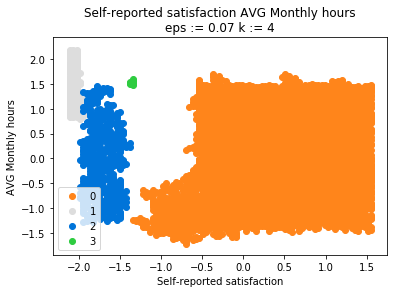

left,0,1
cluster,,
-1,0.908284,0.091716
0,0.853125,0.146875
1,0.065327,0.934673
2,0.966403,0.033597
3,0.857143,0.142857
4,0.600000,0.400000
5,0.750000,0.250000
6,0.923077,0.076923
7,0.500000,0.500000


In [24]:
with open("pickles/dbscan/satisfaction_level,average_montly_hours-chebyshev-4dbscan.eps.graphs", "rb") as log:
    dbscan_graph = pickle.load(log)

var_x = "satisfaction_level"
var_y = "average_montly_hours"
eps = 0.07
min_points = 4
distances = dbscan_graph[:]
distances = np.clip(distances,0, 1)
sorted_distances = sorted(distances)
set_sorted_distances = sorted(set(distances))

# Preprocess
df_prime = hr.normal[[var_x, var_y]]
df_prime = df_prime.drop_duplicates()

dbscan = DBSCAN(eps=eps, min_samples=min_points, metric="euclidean")
clusters = dbscan.fit_predict(df_prime)
df_prime = df_prime.assign(cluster = clusters)
hist, bins = np.histogram(dbscan.labels_, bins=range(-1, len(set(dbscan.labels_)) + 1))
title = labels_pretty_print[var_x] + " " + labels_pretty_print[var_y] + "\neps := " + str(eps) + " k := " + str(min_points)
color_keys = ["orange", "silver", "blue", "green"]
colors = [large_palette_full[color] for color in color_keys]
draw(df_prime, "satisfaction_level", "average_montly_hours", eps, min_points, "euclidean", title, colors=colors)

# Cross variables
df_prime = df_prime.assign(left = hr.normal["left"])
phi = pd.crosstab(df_prime["cluster"], df_prime["left"])
phi_ptg = phi.div(phi.sum(1).astype(float), axis=0)
phi_ptg.plot(kind="bar", stacked=True)
pp.savefig(title + "-left" + ".svg")
phi
phi_ptg
#pp.show()

In [33]:
p = pd.crosstab(df_prime["cluster"], df_prime["left"])
p = p.div(p.sum(1).astype(float), axis=0)
sizes = [df_prime[df_prime["cluster"] == i].shape[0] for i in set(df_prime["cluster"])]
df_prime_ = df_prime.assign(s=pd.Series(sizes))

#df_prime_[df_prime_["s"] >= 50][["cluster", "s"]]
df_prime_ = df_prime_[df_prime_["cluster"].isin([0, 1, 2, 70])]
p = pd.crosstab(df_prime_["cluster"], df_prime_["left"])
p = p.div(p.sum(1).astype(float), axis=0)
p

left,0,1
cluster,,
0,0.853125,0.146875
1,0.065327,0.934673
2,0.966403,0.033597


In [ ]:
eps = 0.05
distances = dbscan_graph[:]
distances = np.clip(distances,0, 1)
sorted_distances = sorted(distances)
set_sorted_distances = sorted(set(distances))

df_prime = hr.normal[[var_x, var_y]]
dbscan = DBSCAN(eps=eps, min_samples=min_points, metric="euclidean")
clusters = dbscan.fit_predict(df_prime)
df_prime = df_prime.assign(cluster = clusters)
hist, bins = np.histogram(dbscan.labels_, bins=range(-1, len(set(dbscan.labels_)) + 1))

title = labels_pretty_print[var_x] + " " + labels_pretty_print[var_y] + "\neps := " + str(eps)
        + " k := " + str(min_points)
draw(df_prime, "satisfaction_level", "average_montly_hours", eps, min_points, "euclidean", title)

df_prime = df_prime.assign(left = hr.normal["left"])
phi = pd.crosstab(df_prime["cluster"], df_prime["left"])
phi_ptg = phi.div(phi.sum(1).astype(float), axis=0)
phi_ptg.plot(kind="bar", stacked=True)
pp.savefig(title + "left" + ".svg")
phi
phi_ptg
pp.show()

# post processing
sizes = list(map(lambda x: x.shape[0], [df_prime[df_prime["cluster"] == i] for i in set(clusters)]))
sizes = list(zip(sizes, set(clusters)))
sorted_sizes = sorted(set(sizes), reverse=True)
sorted_filtered_sizes = list(filter(lambda x: x[0] >= 50, sorted_sizes))
filtered_df_prime = df_prime[df_prime["cluster"].isin(list(map(lambda x: x[1], sorted_filtered_sizes)))]
draw(filtered_df_prime, "satisfaction_level", "average_montly_hours", eps, min_points,
     "euclidean", "filtered." + title)

filtered_df_prime = filtered_df_prime.assign(left = hr.normal["left"])

In [ ]:
eps = 0.05
distances = dbscan_graph[:]
distances = np.clip(distances,0, 1)
sorted_distances = sorted(distances)
set_sorted_distances = sorted(set(distances))

df_prime = hr.normal[[var_x, var_y]]
dbscan = DBSCAN(eps=eps, min_samples=min_points, metric="euclidean")
clusters = dbscan.fit_predict(df_prime)
df_prime = df_prime.assign(cluster = clusters)
hist, bins = np.histogram(dbscan.labels_, bins=range(-1, len(set(dbscan.labels_)) + 1))

title = labels_pretty_print[var_x] + " " + labels_pretty_print[var_y] + "\neps := " + str(eps)
        + " k := " + str(min_points)
draw(df_prime, "satisfaction_level", "average_montly_hours", eps, min_points, "euclidean", title)

df_prime = df_prime.assign(left = hr.normal["left"])
phi = pd.crosstab(df_prime["cluster"], df_prime["left"])
phi_ptg = phi.div(phi.sum(1).astype(float), axis=0)
phi_ptg.plot(kind="bar", stacked=True)
pp.savefig(title + "left" + ".svg")
phi
phi_ptg
pp.show()

# post processing
sizes = list(map(lambda x: x.shape[0], [df_prime[df_prime["cluster"] == i] for i in set(clusters)]))
sizes = list(zip(sizes, set(clusters)))
sorted_sizes = sorted(set(sizes), reverse=True)
sorted_filtered_sizes = list(filter(lambda x: x[0] >= 50, sorted_sizes))
filtered_df_prime = df_prime[df_prime["cluster"].isin(list(map(lambda x: x[1], sorted_filtered_sizes)))]
draw(filtered_df_prime, "satisfaction_level", "average_montly_hours", eps, min_points,
     "euclidean", "filtered." + title)

filtered_df_prime = filtered_df_prime.assign(left = hr.normal["left"])
phi = pd.crosstab(filtered_df_prime["cluster"], filtered_df_prime["left"])
phi_ptg = phi.div(phi.sum(1).astype(float), axis=0)
phi_ptg.plot(kind="barh", stacked=True)
pp.savefig("filtered_" + title + "left" + ".svg")
phi
phi_ptg
pp.show()

phi = pd.crosstab(filtered_df_prime["left"], filtered_df_prime["cluster"])
phi_ptg = phi.div(phi.sum(1).astype(float), axis=0)
phi_ptg.plot(kind="bar", stacked=True)
pp.savefig("filtered_" + title + "left" + ".svg")
phi
phi_ptg
pp.show()

list(map(lambda x: (x[0]/13958, x[1]), sorted_filtered_sizes))
phi_ptg

In [14]:
with open("satisfaction_level,average_montly_hours-euclidean-dbscan.eps.graphs", "rb") as log:
    dbscan_graph = pickle.load(log)

var_x = "satisfaction_level"
var_y = "average_montly_hours"
metric = "euclidean"
k = 4
eps = 0.05

# Dataset without obvious clusters
df_prime = df[~df["cluster"].isin([0,1,2,3,23,-1])]
entry = var_x + "," + var_y
df_prime = df_prime[[var_x, var_y]]
m = df_prime.shape[0]

entries = [("satisfaction_level", "average_montly_hours")]

for (var_x, var_y) in entries:
    entry = var_x + "," + var_y

    for metric in ["euclidean"]:
        distance_matrix = cdist(df_prime, df_prime, metric=metric)
        # sort rows, then sort columns
        distance_matrix.sort(axis=1)
        distance_matrix.sort(axis=0)

        for k in [4]:
            figure, axes = pp.subplots()
            distances = distance_matrix[:, k]

            axes.plot(range(df_prime.shape[0]), distances)
            axes.set_title("Distance for " + str(k) + "th neighbor [" + metric + "]" + " " + entry)
            axes.set_xlabel("Points at distance eps")
            axes.set_ylabel("Distance")
            axes.grid()
            pp.savefig(entry + ":" + str(k) + " [" + metric + "]" + " " + entry + ".svg")
            pp.clf()
            pp.cla()
            pp.close(figure)

distances = dbscan_graph[:]
distances = np.clip(distances,0, 1)
sorted_distances = sorted(distances)
set_sorted_distances = sorted(set(distances))

df = hr.normal[[var_x, var_y]]
dbscan = DBSCAN(eps=eps, min_samples=min_points, metric="euclidean")
clusters = dbscan.fit_predict(df)
df = df.assign(cluster = clusters)
hist, bins = np.histogram(dbscan.labels_, bins=range(-1, len(set(dbscan.labels_)) + 1))

NameError: name 'df' is not defined